In [1]:
# import library
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
print(tf.__version__)
import zipfile,os
import random
import shutil
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from google.colab import files
from keras.preprocessing import image

2.6.0


In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir(r'/content/drive/My Drive/Tugas/satria-data')


In [4]:
#!unzip "data.zip"

In [5]:
base_dir = '/content/drive/My Drive/Tugas/satria-data/data'
train = os.path.join(base_dir, 'Train_gender')
test = os.path.join(base_dir, 'Testing')

In [6]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [7]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.2)

In [8]:
train_generator = train_datagen.flow_from_directory(
        train,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        subset='training')
 
val_generator = train_datagen.flow_from_directory(
        train,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        subset='validation')

Found 1849 images belonging to 2 classes.
Found 461 images belonging to 2 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
callbacks = myCallback()

iterate_model = model.fit(
      train_generator,
      steps_per_epoch=len(train_generator), 
      epochs=50, 
      validation_data=val_generator, 
      validation_steps=len(val_generator),  
      verbose=1,
      callbacks=[callbacks])

Epoch 1/50
93/93 [==============================] - 645s 7s/step - loss: 0.6942 - accuracy: 0.5738 - val_loss: 0.6790 - val_accuracy: 0.5813
Epoch 2/50
93/93 [==============================] - 161s 2s/step - loss: 0.6821 - accuracy: 0.5803 - val_loss: 0.6777 - val_accuracy: 0.5965
Epoch 3/50
93/93 [==============================] - 162s 2s/step - loss: 0.6808 - accuracy: 0.5803 - val_loss: 0.6792 - val_accuracy: 0.5813
Epoch 4/50
93/93 [==============================] - 163s 2s/step - loss: 0.6783 - accuracy: 0.5771 - val_loss: 0.6787 - val_accuracy: 0.5835
Epoch 5/50
93/93 [==============================] - 162s 2s/step - loss: 0.6787 - accuracy: 0.5798 - val_loss: 0.6760 - val_accuracy: 0.5813
Epoch 6/50
93/93 [==============================] - 163s 2s/step - loss: 0.6707 - accuracy: 0.6009 - val_loss: 0.7128 - val_accuracy: 0.5662
Epoch 7/50
93/93 [==============================] - 160s 2s/step - loss: 0.6632 - accuracy: 0.6003 - val_loss: 0.6671 - val_accuracy: 0.6009
Epoch 8/50
93

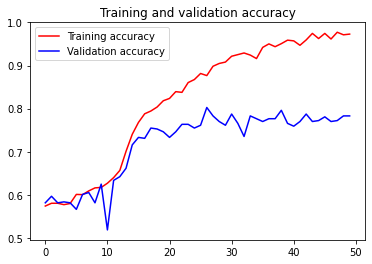

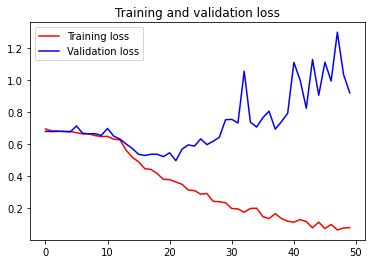

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = iterate_model.history['accuracy']
val_acc = iterate_model.history['val_accuracy']
loss = iterate_model.history['loss']
val_loss = iterate_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()